In [109]:
#importing all the modules required
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

import warnings

warnings.filterwarnings(action="ignore")

In [110]:
df =  pd.read_csv('data/Pokemon.csv') 

In [112]:
df.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [113]:
df.shape

(721, 23)

In [114]:
df.describe()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,644.000000,721.000000,721.000000,721.000000
mean,361.00000,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.553377,1.144979,56.773370,100.246879
std,208.27906,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.199969,1.044369,89.095667,76.573513
min,1.00000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.000000,0.100000,0.100000,3.000000
25%,181.00000,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,361.00000,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,541.00000,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,721.00000,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


<Figure size 720x576 with 0 Axes>

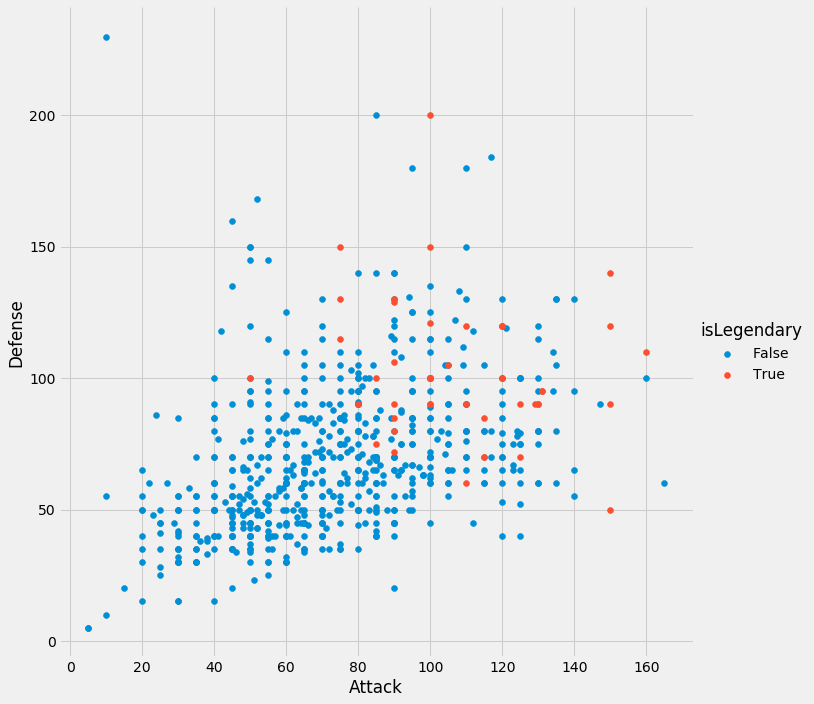

In [115]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,8))

sns.FacetGrid(df, hue="isLegendary", size = 10).map(plt.scatter, "Attack", "Defense").add_legend()

In [116]:
df = df.set_index('Name')
df2 = df[(df['Type_1']=='Fire')]
df2 = df2.drop('Generation', axis=1)
print("Fire Pokemon with Max HP:",df2['HP'].argmax())
print("Fire Pokemon with Max SPEED:", df2['Speed'].argmax())
print("Fire Pokemon with Max Sp.Attack:", df2['Sp_Atk'].argmax())
print("Fire Pokemon with Max Sp.Defense:", df2['Sp_Def'].argmax())
print("Fire Pokemon with Max Attack:", df2['Attack'].argmax())
print("Fire Pokemon with Max Defense:", df2['Defense'].argmax())

Fire Pokemon with Max HP: Entei
Fire Pokemon with Max SPEED: Talonflame
Fire Pokemon with Max Sp.Attack: Heatran
Fire Pokemon with Max Sp.Defense: Ho-Oh
Fire Pokemon with Max Attack: Darmanitan
Fire Pokemon with Max Defense: Torkoal


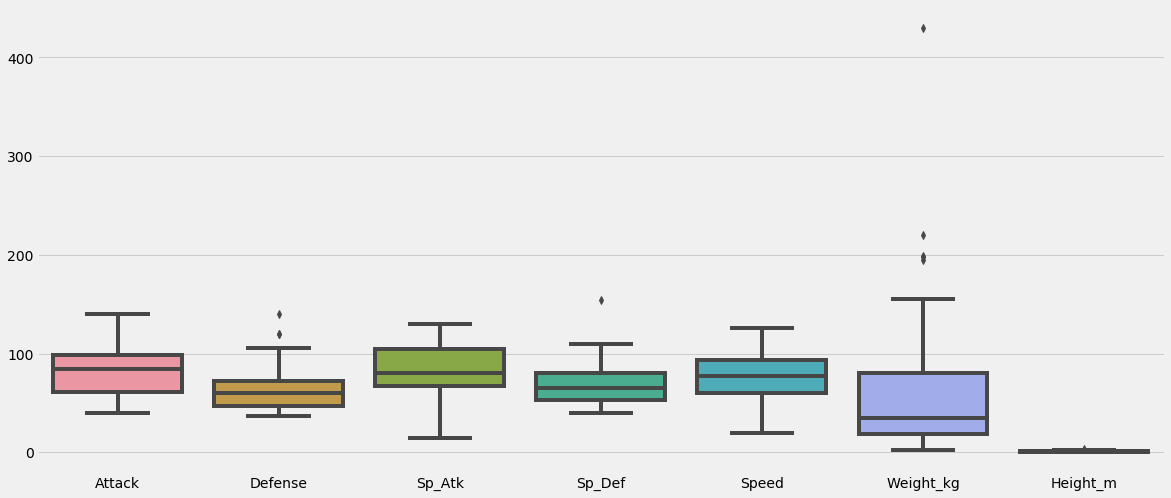

In [9]:
plt.figure(figsize=(18,8))

df3 = df[(df['Type_1']=='Fire')]#selecting fire type 
df3 = df3[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
sns.boxplot(data = df3)

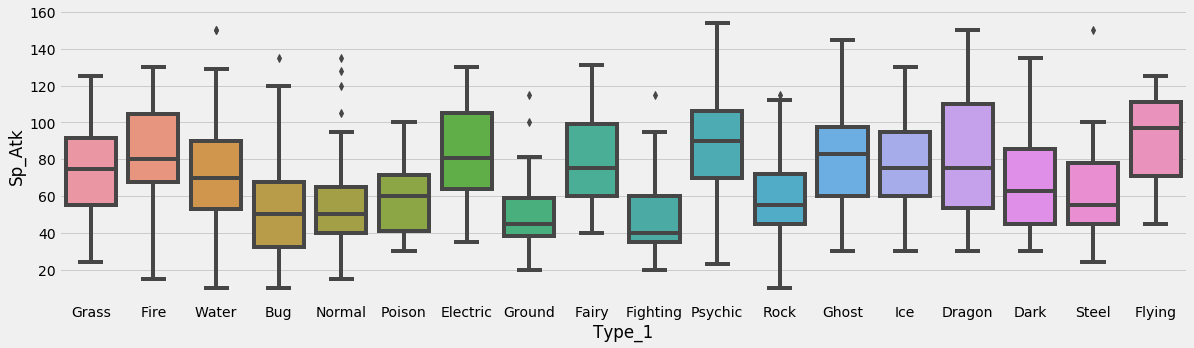

In [118]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Sp_Atk", data=df)

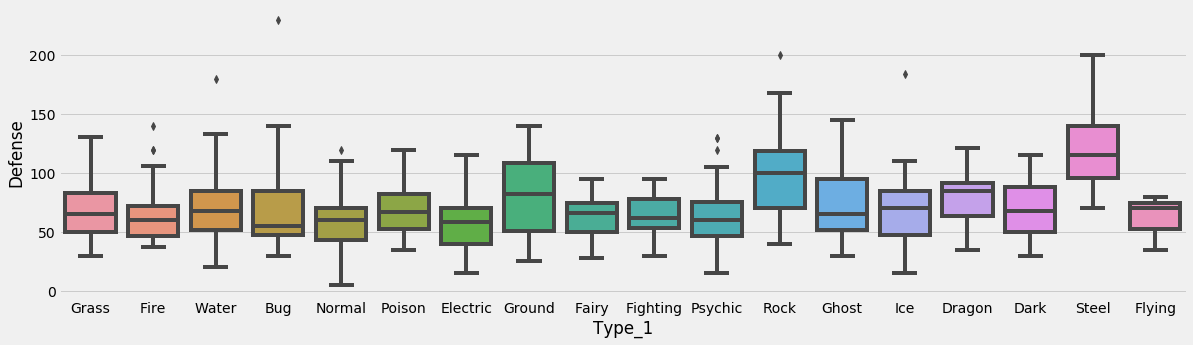

In [11]:
plt.subplots(figsize = (18,5))
sns.boxplot(x="Type_1", y="Defense", data=df)

In [12]:
df.pivot_table(values='isLegendary',index=['Generation'],aggfunc=np.mean).reset_index()

,Generation,isLegendary
0,1,0.026490
1,2,0.050000
2,3,0.074074
3,4,0.102804
4,5,0.064103
5,6,0.083333


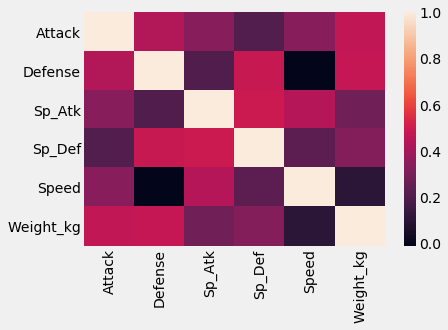

In [152]:
# plt.subplots(figsize = (18,5))
sns.heatmap(df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg"]].corr())

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = df[["Attack", "Defense", "Sp_Atk", "Sp_Def", "Speed", "Weight_kg", "Height_m"]]
logistic_model = LogisticRegression()
logistic_model.fit(X, df["isLegendary"])
predictions = logistic_model.predict(X)
accuracy = metrics.accuracy_score(predictions,df["isLegendary"])
print(accuracy)

0.9528432732316228


In [151]:
df.dtypes

level_0               int64
index                 int64
Name                 object
Number                int64
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
pred                   bool
prob                float64
dtype: object

In [161]:
df["pred"] = predictions
prob =[x[1] for x in logistic_model.predict_proba(X)]

df["prob"] = prob
selection = df[["Name","isLegendary","pred", "prob"]]
selection[selection["isLegendary"] == True].head()

,Name,isLegendary,pred,prob
143,Articuno,True,False,0.151642
144,Zapdos,True,False,0.204755
145,Moltres,True,False,0.181361
149,Mewtwo,True,True,0.541117
242,Raikou,True,False,0.401714


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                   df["isLegendary"], 
                   test_size=0.7,  
                   train_size=0.3,    
                   random_state=42)

In [167]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, Y_train)
pred_train = logistic_model.predict(X_train)
pred_test =  logistic_model.predict(X_test)
train_accuracy = metrics.accuracy_score(pred_train,Y_train)
test_accuracy = metrics.accuracy_score(pred_test,Y_test)


In [168]:
train_accuracy

0.9398148148148148

In [169]:
test_accuracy

0.9386138613861386

In [63]:
data = df
def updateTypeColumn(dataframe, columnName, columnValue):
    for index, row in dataframe.iterrows():
        if row.Type_1 == columnValue:
            dataframe.loc[index, columnName] = 1
        else:
            dataframe.loc[index, columnName] = 0
            
updateTypeColumn(data, 'Type_1', 'Fire')
data['Type_1'] = data['Type_1'].apply(int) # Converts column to int

In [92]:
lm.coef_

array([[ 0.0090081 , -0.02479815,  0.02206107, -0.00975205, -0.00150383,
         0.00361378, -0.34639879]])

In [91]:
lm = LogisticRegression()
lm.fit(X, data["Type_1"])
pred = logistic_model.predict(X)
acc = metrics.accuracy_score(pred,data["Type_1"])
print(acc)

0.9348127600554785


In [105]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [108]:
sigmoid(52)

1.0

In [93]:
data["prob"] = lm.predict_proba(X)[:,1]

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


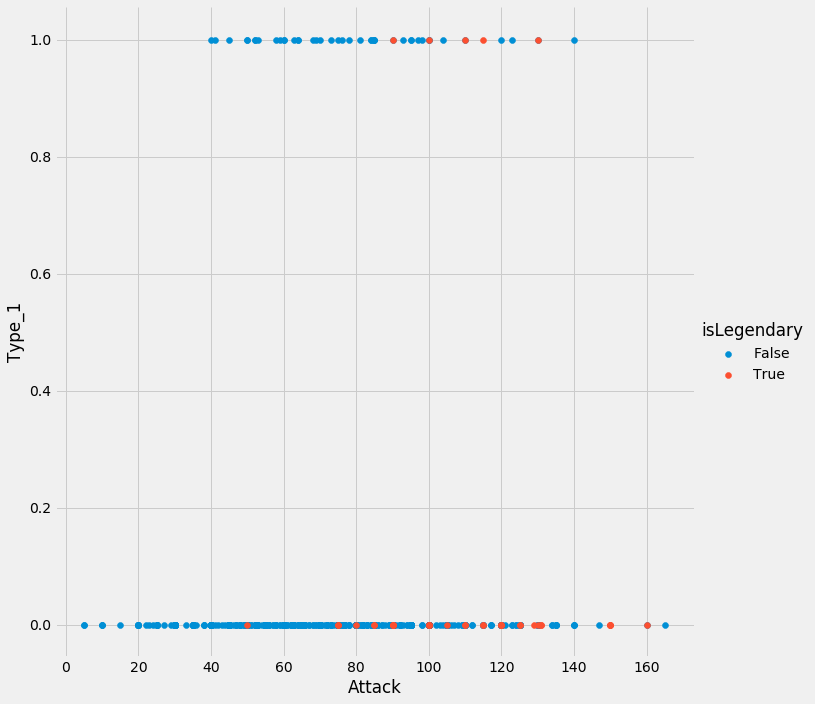

In [104]:
sns.FacetGrid(data, hue="isLegendary", size = 10).map(plt.scatter, "Attack", "Type_1").add_legend()